The hypothesis to prove inbetween the variables:
x:
Work instrumental support expectations (T1) 
Work relational support expectations (T1) 
Work role overload (T1) 
Work emotional demands (T1)
Family instrumental support expectations (T1)
Family relational support expectations (T1)
Family role overload (T1) 
Family emotional demands (T1) 

y:
Work role adjustment (T1)

The columns from above depicts the image in the paper, which translates to the following columns on the data:
selected_columns = ['average_wcowinsexphelp', 'average_wallcowexp', 'average_roleover', 'average_wemotdem','average_faminstexp', 'average_famallexp', 'average_froleover','average_femotdem','average_workadj']  




In [ ]:
!pip install PIL

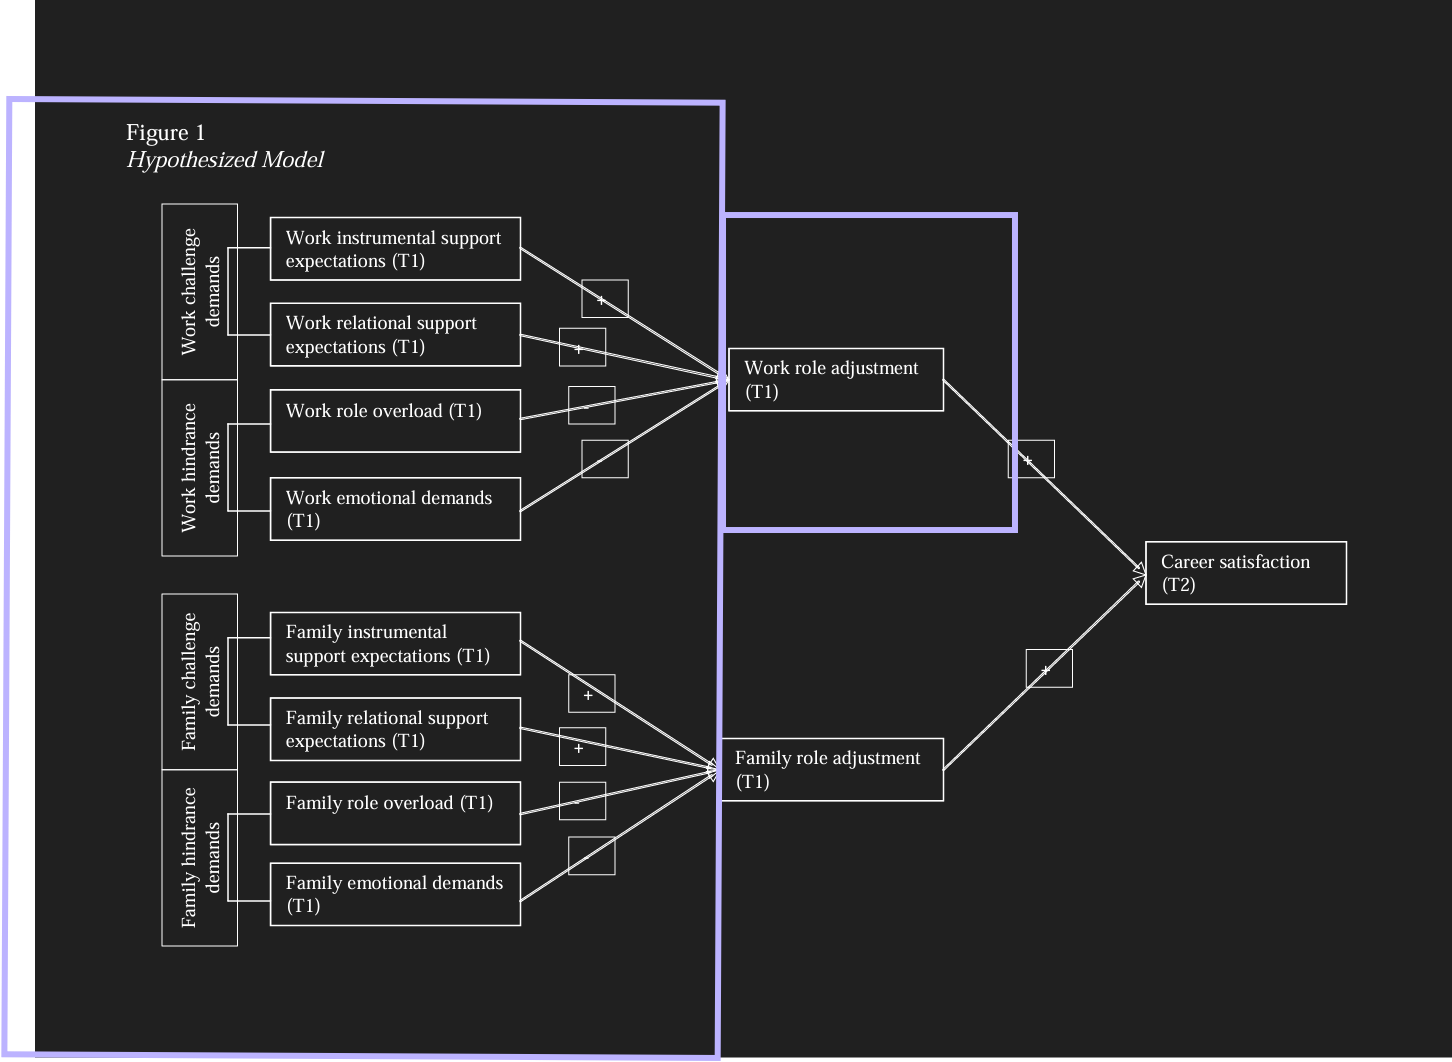

In [1]:
from IPython.display import Image, display

# Display an image
image_path = "../image_1_1.png"
display(Image(filename=image_path))


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the CSV
file_path = "preprocessed_data.csv"  
data = pd.read_csv(file_path)

# Step 2: Filter Columns
# Specifying the columns that I want to keep for ML model
selected_columns = ['average_wcowinsexphelp', 'average_wallcowexp', 'average_roleover', 'average_wemotdem','average_faminstexp', 'average_famallexp', 'average_froleover','average_femotdem','average_workadj']  
filtered_data = data[selected_columns]

In [2]:
filtered_data.head

<bound method NDFrame.head of      average_wcowinsexphelp  average_wallcowexp  average_roleover  \
0                      4.25            2.416667          3.666667   
1                      4.25            3.416667          4.000000   
2                      2.75            2.500000          4.000000   
3                      5.00            4.166667          3.000000   
4                      4.25            4.000000          3.333333   
..                      ...                 ...               ...   
574                    4.50            3.916667          3.666667   
575                    2.00            1.000000          3.666667   
576                    4.00            4.000000          2.000000   
577                    5.00            4.750000          5.000000   
578                    4.25            4.500000          4.333333   

     average_wemotdem  average_faminstexp  average_famallexp  \
0                 4.4                4.25           3.750000   
1            

Correlation Matrix

In [3]:
correlation_matrix = filtered_data.corr(method='pearson')  
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                         average_wcowinsexphelp  average_wallcowexp  \
average_wcowinsexphelp                1.000000            0.486840   
average_wallcowexp                    0.486840            1.000000   
average_roleover                      0.303350            0.181447   
average_wemotdem                      0.490505            0.406907   
average_faminstexp                    0.483756            0.435100   
average_famallexp                     0.183684            0.442413   
average_froleover                     0.338900            0.218103   
average_femotdem                      0.442074            0.336263   
average_workadj                       0.250495            0.353017   

                        average_roleover  average_wemotdem  \
average_wcowinsexphelp          0.303350          0.490505   
average_wallcowexp              0.181447          0.406907   
average_roleover                1.000000          0.389558   
average_wemotdem              

Correlation Matrix filtered to check the relation between each X and y

In [4]:

correlations = filtered_data.corr()["average_workadj"].sort_values(ascending=False)
# Display correlation of each feature with the target
print("Correlation of features with average_workadj  :")
print(correlations)

Correlation of features with average_workadj  :
average_workadj           1.000000
average_famallexp         0.366954
average_wallcowexp        0.353017
average_wcowinsexphelp    0.250495
average_faminstexp        0.213700
average_femotdem          0.164685
average_wemotdem          0.125785
average_froleover         0.025902
average_roleover         -0.069741
Name: average_workadj, dtype: float64


ML modeling

In [5]:
# Features and target
X = filtered_data.drop(columns=['average_workadj'])
y = filtered_data['average_workadj']


In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.27


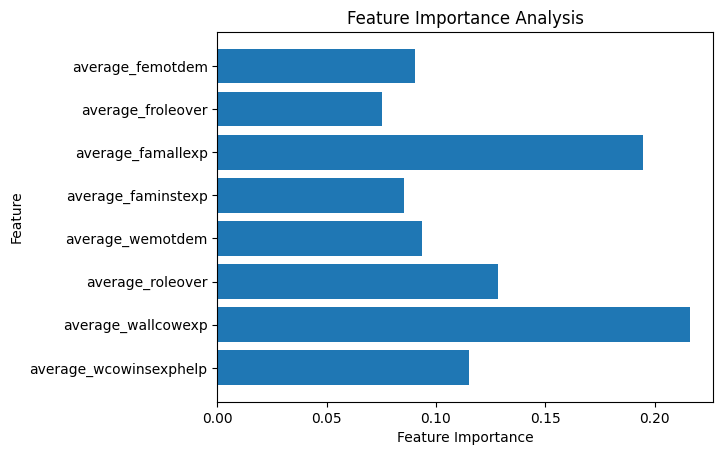

In [7]:
import matplotlib.pyplot as plt

# Feature importance
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Analysis")
plt.show()


In [8]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform Grid Search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters and MSE
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
print(f"Tuned Mean Squared Error: {mse_tuned:.2f}")


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Tuned Mean Squared Error: 0.27


No update

In [9]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestRegressor(random_state=42, max_depth=5, min_samples_leaf=2, min_samples_split=2,n_estimators=50)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.27


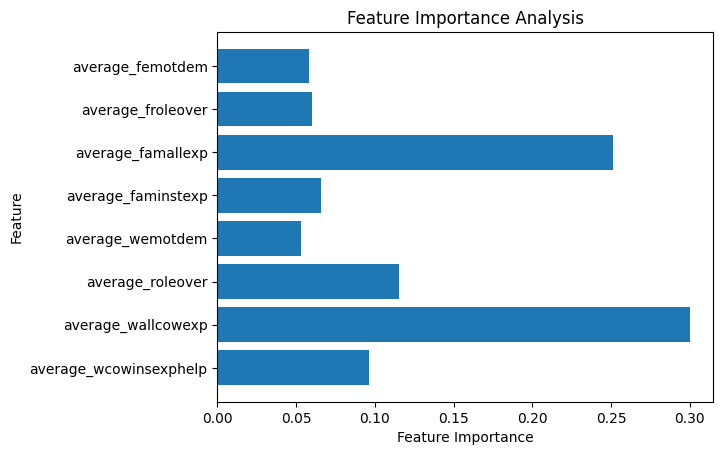

In [11]:

# Feature importance
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Analysis")
plt.show()

Cross-Validation
Use cross-validation to ensure the model performs consistently across different subsets of the data.

In [12]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
print(f"Cross-Validated Mean Squared Error: {cv_mse:.2f}")


Cross-Validated Mean Squared Error: 0.32


 Check for Overfitting
Compare training and testing errors. If the training error is much lower, your model might be overfitting

In [13]:
# Training error
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Training Mean Squared Error: {mse_train:.2f}")


Training Mean Squared Error: 0.22


In [14]:
import pandas as pd
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)
print(feature_importances)


                  Feature  Importance
1      average_wallcowexp    0.299961
5       average_famallexp    0.251005
2        average_roleover    0.115470
0  average_wcowinsexphelp    0.096480
4      average_faminstexp    0.065752
6       average_froleover    0.059911
7        average_femotdem    0.058389
3        average_wemotdem    0.053031


Global Correlation Insights

While Random Forests are non-linear models, you can compute Pearson correlation coefficients between each feature and the target (workadj1) to check for linear relationships.

In [15]:
correlations = X.join(y).corr()['average_workadj']
print(correlations.sort_values(ascending=False))


average_workadj           1.000000
average_famallexp         0.366954
average_wallcowexp        0.353017
average_wcowinsexphelp    0.250495
average_faminstexp        0.213700
average_femotdem          0.164685
average_wemotdem          0.125785
average_froleover         0.025902
average_roleover         -0.069741
Name: average_workadj, dtype: float64


In [ ]:
!pip install shap
!pip install xgboost

 SHAP Values (SHapley Additive exPlanations)
SHAP values explain the output of a machine learning model by assigning each feature an importance value for each prediction. It provides a global view of feature impact as well as local explanations for individual predictions.

C:\Users\reema\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


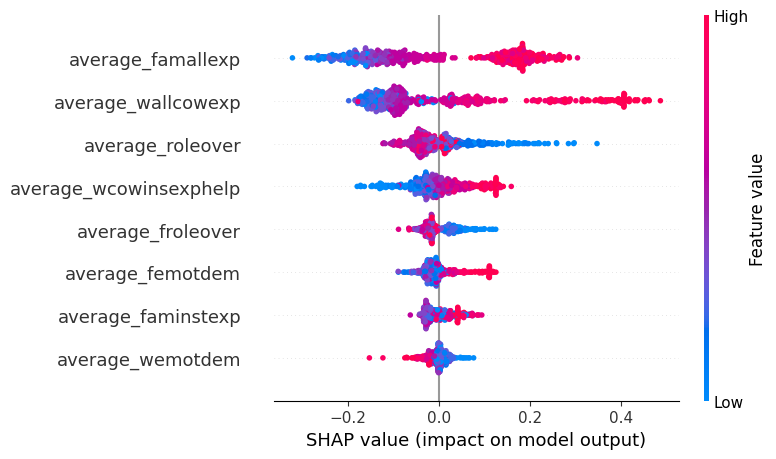

In [16]:
import shap

# Explain the model's predictions
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Visualize global feature importance
shap.summary_plot(shap_values, X)


<!-- The SHAP (SHapley Additive exPlanations) summary plot shows the impact of four features on the model's output, with each point representing a data instance. Here’s a breakdown:

average_wallcowexp:

Higher values (pink) positively impact the model output, while lower values (blue) negatively impact it.
This feature has the strongest positive influence on the output.
average_roleover:

Higher values (pink) generally push the model output toward the negative side.
It has a negative impact on the model output, especially for higher values.
average_wcowinsexphelp:

Higher values (pink) show a slight positive influence, while lower values (blue) tend to push the output negatively.
The effect is relatively small but positive.
average_wemotdem:

Both low and high values have minimal impact on the output, centered around zero.
It is the least impactful feature among the four.
Summary:
Key Influencer: average_wallcowexp has the most significant positive impact.
Negative Impact: average_roleover reduces the model output.
Lesser Impact: average_wcowinsexphelp and average_wemotdem have smaller, mixed influences. -->


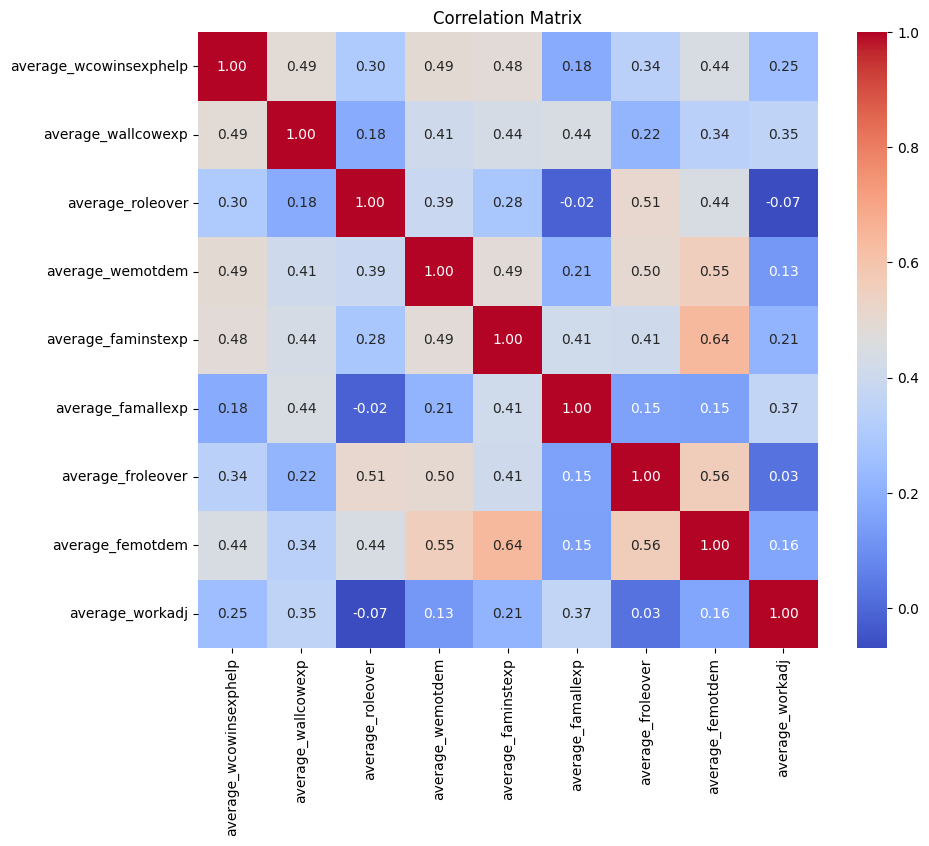

In [17]:
import seaborn as sns

# Compute correlation matrix
corr = X.join(y).corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


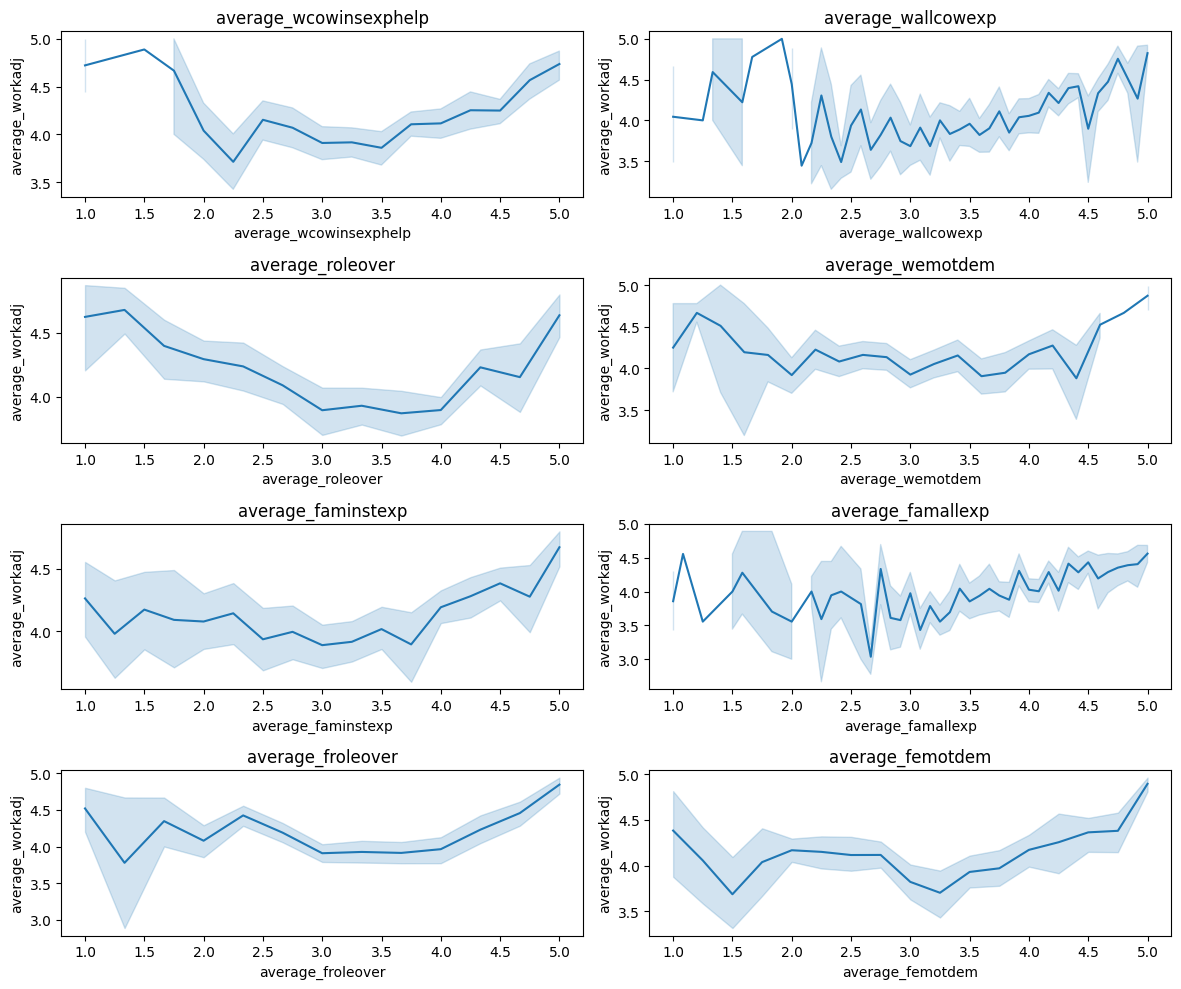

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 grid of subplots (2 rows, 2 columns)
fig, axs = plt.subplots(4, 2, figsize=(12, 10))

# List of features to plot
features =['average_wcowinsexphelp', 'average_wallcowexp', 'average_roleover', 'average_wemotdem','average_faminstexp', 'average_famallexp', 'average_froleover','average_femotdem']  

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Loop through the features and plot each one in a subplot
for i, feature in enumerate(features):
    sns.lineplot(x=X[feature], y=y, ax=axs[i])
    axs[i].set_title(f"{feature}")
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("average_workadj")

# Adjust the layout so that plots do not overlap
plt.tight_layout()

# Show the plots
plt.show()


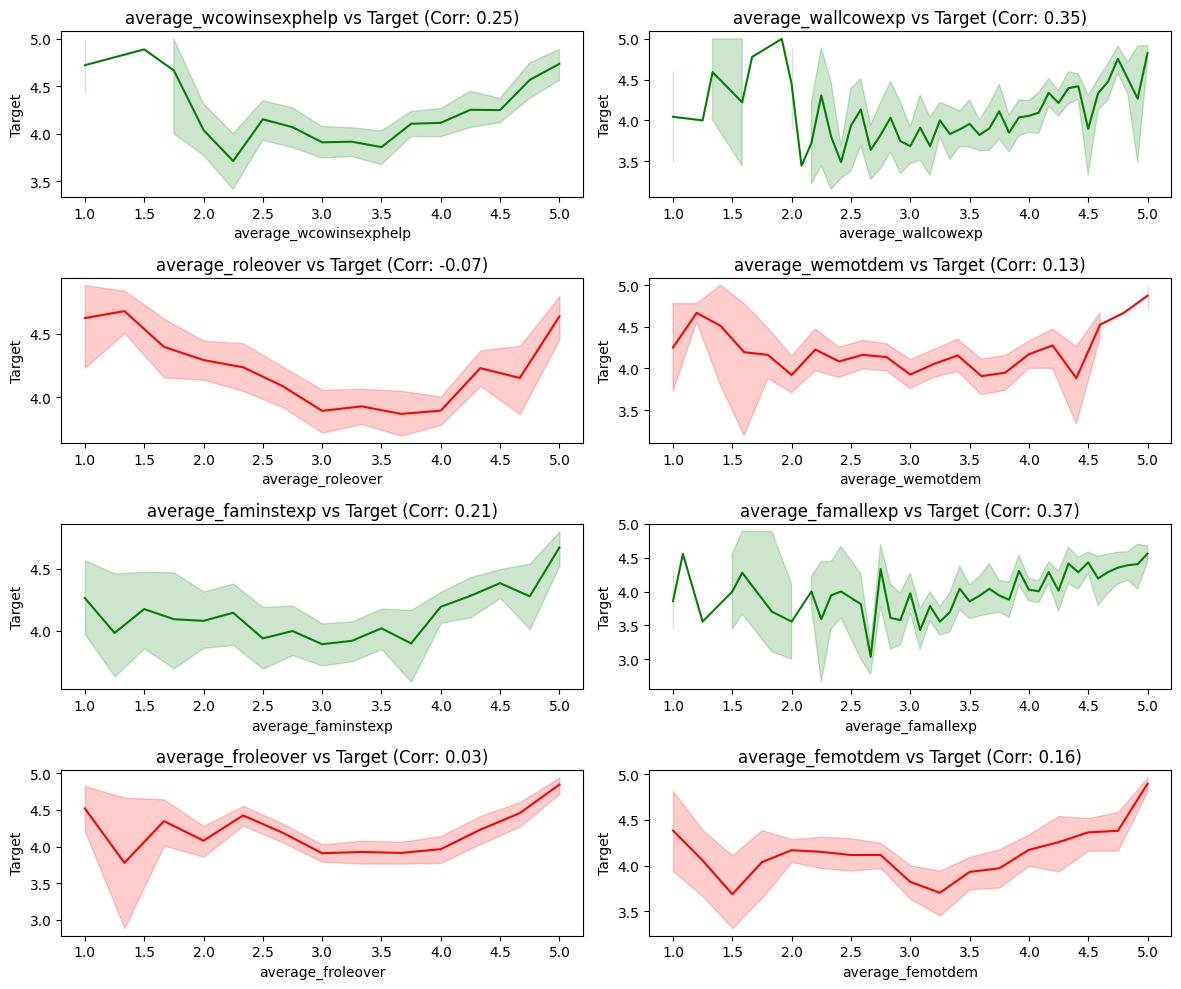

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate the correlation between each feature and the target
correlations = X.corrwith(y)

# Create a 2x2 grid of subplots (2 rows, 2 columns)
fig, axs = plt.subplots(4, 2, figsize=(12, 10))

# List of features to plot
features = ['average_wcowinsexphelp', 'average_wallcowexp', 'average_roleover', 'average_wemotdem','average_faminstexp', 'average_famallexp', 'average_froleover','average_femotdem']  

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Loop through the features and plot each one in a subplot
for i, feature in enumerate(features):
    # Get the correlation for the current feature
    corr = correlations[feature]
    
    # Set the color based on the correlation
    if corr > 0.2:
        color = 'green'  # Positive correlation
    elif corr < 0.2:
        color = 'red'    # Negative correlation
    else:
        color = 'blue'   # No correlation or neutral
    
    # Create a line plot
    sns.lineplot(x=X[feature], y=y, ax=axs[i], color=color)
    axs[i].set_title(f"{feature} vs Target (Corr: {corr:.2f})")
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("Target")

# Adjust the layout so that plots do not overlap
plt.tight_layout()

# Show the plots
plt.show()


After combining the columns relevant to work and family to predict the work role adjustment and with the threshold still being 2( for better comparision) the theory still holds right wrt the positive and negative relationships.
